<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal Polinómica. 
# objetivo: predecir el sueldo de un empleado de acuerdo a su nivel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Nueva sección

In [8]:
data1 = pd.read_csv('/content/drive/My Drive/Dataset/Position_Salaries.csv',delimiter=',')
x = data1.iloc [:,1:2].values
y = data1.iloc [:,2].values

In [ ]:
pd.DataFrame(x)

### Dividir el data set en conjunto de entrenamiento y conjunto de testing
# no dividimos el dataset ya que tenemos solo 10 datos. son muy poquitos.
# no escalamos los datos ya que la funcion lo tiene inmerso

In [11]:
""" from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

# Escalado de variables
# en este ejemplo no es necesario lo dejaremos comentariado
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit.transform(x_train)
x_test = sc_x.fit.transform(x_test)
"""

' from sklearn.model_selection import train_test_split\nx_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)\n\n# Escalado de variables\n# en este ejemplo no es necesario lo dejaremos comentariado\nfrom sklearn.preprocessing import StandardScaler\nsc_x = StandardScaler()\nx_train = sc_x.fit.transform(x_train)\nx_test = sc_x.fit.transform(x_test)\n'

### Ajustar las caracteristicas de la regresion lineal polinómica
# Ajustar el modelo con regresion lineal polinomica

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)

In [ ]:
pd.DataFrame(x_poly)

In [16]:
from sklearn.linear_model import LinearRegression
lineal_poly = LinearRegression()
lineal_poly.fit(x_poly,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualizar los resultados

Text(0, 0.5, 'Sueldo')

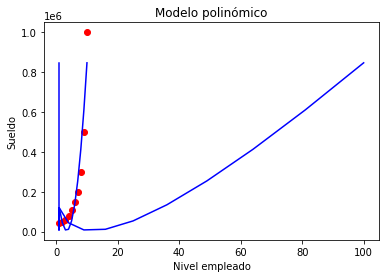

In [17]:
plt.scatter (x,y, color="Red")
plt.plot (x_poly,lineal_poly.predict(x_poly),color="blue")
plt.title ("Modelo polinómico")
plt.xlabel("Nivel empleado")
plt.ylabel("Sueldo")